In [2]:
import wandb
# draw batch solve equal
import wandb
import matplotlib.pyplot as plt
api = wandb.Api()
qwen14B_warmup_run = api.run("nobleai-xjtu/verl_rej_test/runs/verl_rej_test--qwen25_fix_no_entro_2node_16k_2k_math_filtered_nodis_mathqa_512bsz_20ksamples_SUBEM_end") # 1 epoch 42 steps
qwen14B_first_run = api.run("snail-ai-lab/verl_rej_test/runs/verl_rej_test--CURR_NODISS1E_no_entro_2node_16k_2k_math_filtered_dis_mathqa_512bsz_20ksamples_grpo_subem_end") # 4 epoch 168 steps
qwen14B_filter_run = api.run("nobleai-xjtu/verl_rej_test/runs/verl_rej_test--curnodis169_2node_16k_2k_math_FILTERedAGAIN_dis_numchain64_mathqa_512bsz_grpo_SUBEM_end") # 5 epoch 150 steps
# print the length of all records
print(f"length of qwen14B_warmup_run.history(): {len(qwen14B_warmup_run.history())}")
print(f"length of qwen14B_first_run.history(): {len(qwen14B_first_run.history())}")
print(f"length of qwen14B_filter_run.history(): {len(qwen14B_filter_run.history())}")

length of qwen14B_warmup_run.history(): 332
length of qwen14B_first_run.history(): 280
length of qwen14B_filter_run.history(): 166


length of qwen14B_warmup_run.history(): 332
length of qwen14B_first_run.history(): 280
length of qwen14B_filter_run.history(): 166


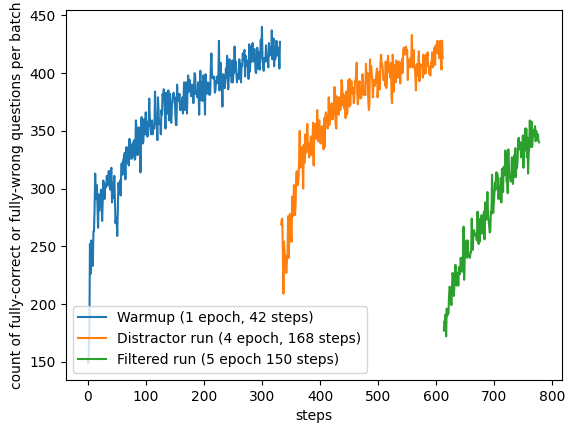

In [3]:
# draw batch solve equal
import wandb
import matplotlib.pyplot as plt

api = wandb.Api()

# 三个 run
qwen14B_warmup_run = api.run(
    "nobleai-xjtu/verl_rej_test/runs/verl_rej_test--qwen25_fix_no_entro_2node_16k_2k_math_filtered_nodis_mathqa_512bsz_20ksamples_SUBEM_end"
)  # 1 epoch 42 steps
qwen14B_first_run = api.run(
    "snail-ai-lab/verl_rej_test/runs/verl_rej_test--CURR_NODISS1E_no_entro_2node_16k_2k_math_filtered_dis_mathqa_512bsz_20ksamples_grpo_subem_end"
)  # 4 epoch 168 steps
qwen14B_filter_run = api.run(
    "nobleai-xjtu/verl_rej_test/runs/verl_rej_test--curnodis169_2node_16k_2k_math_FILTERedAGAIN_dis_numchain64_mathqa_512bsz_grpo_SUBEM_end"
)  # 5 epoch 150 steps

# 打印长度
print(f"length of qwen14B_warmup_run.history(): {len(qwen14B_warmup_run.history())}")
print(f"length of qwen14B_first_run.history(): {len(qwen14B_first_run.history())}")
print(f"length of qwen14B_filter_run.history(): {len(qwen14B_filter_run.history())}")

# 提取数据并画图
y_warmup = qwen14B_warmup_run.history()["batch/solve_equal"].tolist()
plt.plot(range(len(y_warmup)), y_warmup, label="Warmup (1 epoch, 42 steps)")

y_first = qwen14B_first_run.history()["batch/solve_equal"].tolist()
plt.plot(range(len(y_warmup), len(y_warmup) + len(y_first)), y_first,
         label="Distractor run (4 epoch, 168 steps)")

y_filter = qwen14B_filter_run.history()["batch/solve_equal"].tolist()
plt.plot(range(len(y_warmup) + len(y_first),
               len(y_warmup) + len(y_first) + len(y_filter)),
         y_filter,
         label="Filtered run (5 epoch 150 steps)")

# 坐标轴和图例
plt.xlabel("steps")
plt.ylabel("count of fully-correct or fully-wrong questions per batch")
plt.legend()
# plt.title("Qwen2.5-7B Solve Equal Across Runs")

plt.show()


length of qwen14B_warmup_run.history(): 332
length of qwen14B_first_run.history(): 280
length of qwen14B_filter_run.history(): 166


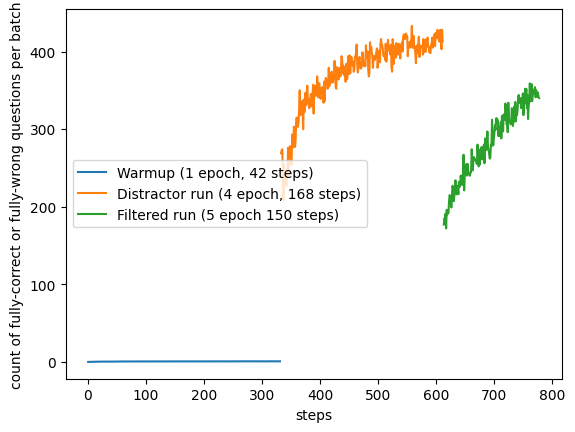

In [7]:
# draw batch solve equal
import wandb
import matplotlib.pyplot as plt
import numpy as np

api = wandb.Api()

# 三个 run
qwen14B_warmup_run = api.run(
    "nobleai-xjtu/verl_rej_test/runs/verl_rej_test--qwen25_fix_no_entro_2node_16k_2k_math_filtered_nodis_mathqa_512bsz_20ksamples_SUBEM_end"
)  # 1 epoch 42 steps
qwen14B_first_run = api.run(
    "snail-ai-lab/verl_rej_test/runs/verl_rej_test--CURR_NODISS1E_no_entro_2node_16k_2k_math_filtered_dis_mathqa_512bsz_20ksamples_grpo_subem_end"
)  # 4 epoch 168 steps
qwen14B_filter_run = api.run(
    "nobleai-xjtu/verl_rej_test/runs/verl_rej_test--curnodis169_2node_16k_2k_math_FILTERedAGAIN_dis_numchain64_mathqa_512bsz_grpo_SUBEM_end"
)  # 5 epoch 150 steps

# 打印长度
print(f"length of qwen14B_warmup_run.history(): {len(qwen14B_warmup_run.history())}")
print(f"length of qwen14B_first_run.history(): {len(qwen14B_first_run.history())}")
print(f"length of qwen14B_filter_run.history(): {len(qwen14B_filter_run.history())}")

# 提取数据并画图
y_warmup = (qwen14B_warmup_run.history()["critic/returns/mean"].tolist())
batchsize=512
num_correct = np.array(qwen14B_warmup_run.history()['critic/num_all_right'].tolist())
num_wrong = np.array(qwen14B_warmup_run.history()['critic/num_all_wrong'].tolist())
y_warmup = (y_warmup*(batchsize-num_wrong-num_correct) +num_correct)/batchsize
plt.plot(range(len(y_warmup)), y_warmup, label="Warmup (1 epoch, 42 steps)")

y_first = qwen14B_first_run.history()["batch/solve_equal"].tolist()
plt.plot(range(len(y_warmup), len(y_warmup) + len(y_first)), y_first,
         label="Distractor run (4 epoch, 168 steps)")

y_filter = qwen14B_filter_run.history()["batch/solve_equal"].tolist()
plt.plot(range(len(y_warmup) + len(y_first),
               len(y_warmup) + len(y_first) + len(y_filter)),
         y_filter,
         label="Filtered run (5 epoch 150 steps)")

# 坐标轴和图例
plt.xlabel("steps")
plt.ylabel("count of fully-correct or fully-wrong questions per batch")
plt.legend()
# plt.title("Qwen2.5-7B Solve Equal Across Runs")

plt.show()


len(warmup)=331, len(first)=279, len(filter)=165


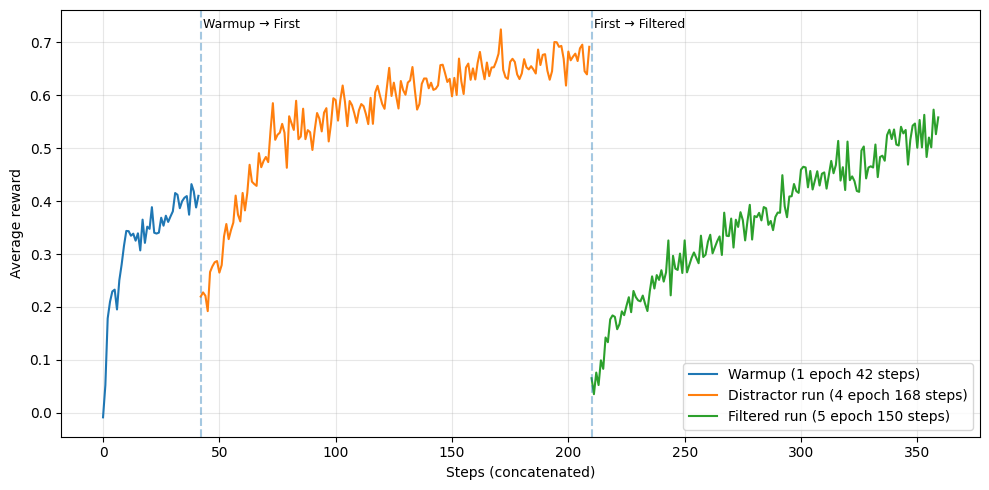

In [8]:
import wandb
import numpy as np
import matplotlib.pyplot as plt

api = wandb.Api()

# 三个 run
qwen14B_warmup_run = api.run(
    "nobleai-xjtu/verl_rej_test/runs/verl_rej_test--qwen25_fix_no_entro_2node_16k_2k_math_filtered_nodis_mathqa_512bsz_20ksamples_SUBEM_end"
)  # 1 epoch ~42 steps
qwen14B_first_run = api.run(
    "snail-ai-lab/verl_rej_test/runs/verl_rej_test--CURR_NODISS1E_no_entro_2node_16k_2k_math_filtered_dis_mathqa_512bsz_20ksamples_grpo_subem_end"
)  # 4 epoch ~168 steps
qwen14B_filter_run = api.run(
    "nobleai-xjtu/verl_rej_test/runs/verl_rej_test--curnodis169_2node_16k_2k_math_FILTERedAGAIN_dis_numchain64_mathqa_512bsz_grpo_SUBEM_end"
)  # max ~151 steps

# 批大小（如三段一致用同一个；若不一致可分别设定）
BATCHSIZE = 512

def fixed_reward_series(run, batchsize=BATCHSIZE):
    """Compute fixed mean reward for a run:
       (returns_mean * (batchsize - num_wrong - num_correct) + num_correct) / batchsize
    """
    # 一次性取所需字段，减少 API 调用
    hist = run.history(keys=[
        "critic/returns/mean",
        "critic/num_all_right",
        "critic/num_all_wrong",
    ])

    returns_mean = np.array(hist.get("critic/returns/mean", []), dtype=float)
    num_right    = np.array(hist.get("critic/num_all_right", []), dtype=float)
    num_wrong    = np.array(hist.get("critic/num_all_wrong", []), dtype=float)

    # 对齐长度（wandb.history 可能字段长度不一致）
    L = min(len(returns_mean), len(num_right), len(num_wrong))
    returns_mean = returns_mean[:L]
    num_right    = num_right[:L]
    num_wrong    = num_wrong[:L]

    # 计算 fixed reward
    fixed = (returns_mean * (batchsize - num_wrong - num_right) + num_right) / batchsize
    return fixed

# 计算三段 fixed rewards
y_warmup = fixed_reward_series(qwen14B_warmup_run, BATCHSIZE) # 1 epoch 42 steps
y_first  = fixed_reward_series(qwen14B_first_run,  BATCHSIZE) # 4 epoch 168 steps
y_filter = fixed_reward_series(qwen14B_filter_run, BATCHSIZE) # 5 epoch 150 steps

print(f"len(warmup)={len(y_warmup)}, len(first)={len(y_first)}, len(filter)={len(y_filter)}")

# 画图（首尾相接）
plt.figure(figsize=(10, 5))

x0_start, x0_end = 0, 42
plt.plot(range(x0_start, x0_end), y_warmup[1:x0_end-x0_start+1], label="Warmup (1 epoch 42 steps)")

x1_start, x1_end = x0_end, x0_end + 168
plt.plot(range(x1_start, x1_end), y_first[1:x1_end-x1_start+1], label="Distractor run (4 epoch 168 steps)")

x2_start, x2_end = x1_end, x1_end + 150
plt.plot(range(x2_start, x2_end), y_filter[1:x2_end-x2_start+1], label="Filtered run (5 epoch 150 steps)")

# 分段竖线与标注
for xpos, name in [(x0_end, "Warmup → First"), (x1_end, "First → Filtered")]:
    plt.axvline(x=xpos, linestyle="--", alpha=0.4)
    plt.text(xpos + 1, plt.gca().get_ylim()[1]*0.98, name, fontsize=9, va="top")

plt.xlabel("Steps (concatenated)")
plt.ylabel("Average reward")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

len(warmup)=331, len(first)=279, len(filter)=165


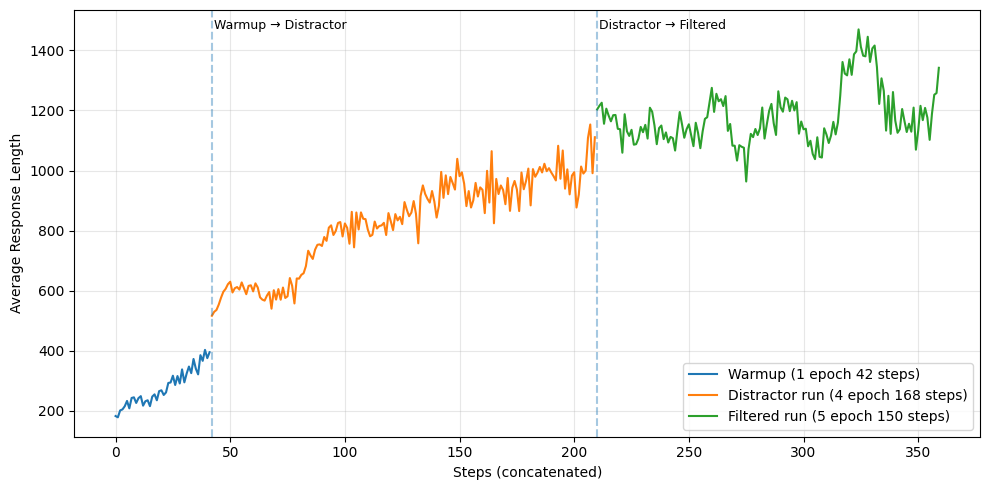

In [9]:
import wandb
import numpy as np
import matplotlib.pyplot as plt

api = wandb.Api()

# 三个 run
qwen14B_warmup_run = api.run(
    "nobleai-xjtu/verl_rej_test/runs/verl_rej_test--qwen25_fix_no_entro_2node_16k_2k_math_filtered_nodis_mathqa_512bsz_20ksamples_SUBEM_end"
)  # 1 epoch ~42 steps
qwen14B_first_run = api.run(
    "snail-ai-lab/verl_rej_test/runs/verl_rej_test--CURR_NODISS1E_no_entro_2node_16k_2k_math_filtered_dis_mathqa_512bsz_20ksamples_grpo_subem_end"
)  # 4 epoch ~168 steps
qwen14B_filter_run = api.run(
    "nobleai-xjtu/verl_rej_test/runs/verl_rej_test--curnodis169_2node_16k_2k_math_FILTERedAGAIN_dis_numchain64_mathqa_512bsz_grpo_SUBEM_end"
)  # max ~151 steps

# 批大小（如三段一致用同一个；若不一致可分别设定）
BATCHSIZE = 512

def fixed_reward_series(run, batchsize=BATCHSIZE):
    """Compute fixed mean reward for a run:
       (returns_mean * (batchsize - num_wrong - num_correct) + num_correct) / batchsize
    """
    # 一次性取所需字段，减少 API 调用
    hist = run.history(keys=[
        "critic/returns/mean",
        "critic/num_all_right",
        "critic/num_all_wrong",
    ])

    returns_mean = np.array(hist.get("critic/returns/mean", []), dtype=float)
    num_right    = np.array(hist.get("critic/num_all_right", []), dtype=float)
    num_wrong    = np.array(hist.get("critic/num_all_wrong", []), dtype=float)

    # 对齐长度（wandb.history 可能字段长度不一致）
    L = min(len(returns_mean), len(num_right), len(num_wrong))
    returns_mean = returns_mean[:L]
    num_right    = num_right[:L]
    num_wrong    = num_wrong[:L]

    # 计算 fixed reward
    fixed = (returns_mean * (batchsize - num_wrong - num_right) + num_right) / batchsize
    return fixed

def get_response_length(run):
    """Compute mean response length for a run."""
    hist = run.history(keys=["response_length/mean"])
    return np.array(hist.get("response_length/mean", []), dtype=float)

# 计算三段 fixed rewards
y_warmup = get_response_length(qwen14B_warmup_run, ) # 1 epoch 42 steps
y_first  = get_response_length(qwen14B_first_run,  ) # 4 epoch 168 steps
y_filter = get_response_length(qwen14B_filter_run, ) # 5 epoch 150 steps

print(f"len(warmup)={len(y_warmup)}, len(first)={len(y_first)}, len(filter)={len(y_filter)}")

# 画图（首尾相接）
plt.figure(figsize=(10, 5))

x0_start, x0_end = 0, 42
plt.plot(range(x0_start, x0_end), y_warmup[1:x0_end-x0_start+1], label="Warmup (1 epoch 42 steps)")

x1_start, x1_end = x0_end, x0_end + 168
plt.plot(range(x1_start, x1_end), y_first[1:x1_end-x1_start+1], label="Distractor run (4 epoch 168 steps)")

x2_start, x2_end = x1_end, x1_end + 150
plt.plot(range(x2_start, x2_end), y_filter[1:x2_end-x2_start+1], label="Filtered run (5 epoch 150 steps)")

# 分段竖线与标注
for xpos, name in [(x0_end, "Warmup → Distractor"), (x1_end, "Distractor → Filtered")]:
    plt.axvline(x=xpos, linestyle="--", alpha=0.4)
    plt.text(xpos + 1, plt.gca().get_ylim()[1]*0.98, name, fontsize=9, va="top")

plt.xlabel("Steps (concatenated)")
plt.ylabel("Average Response Length")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

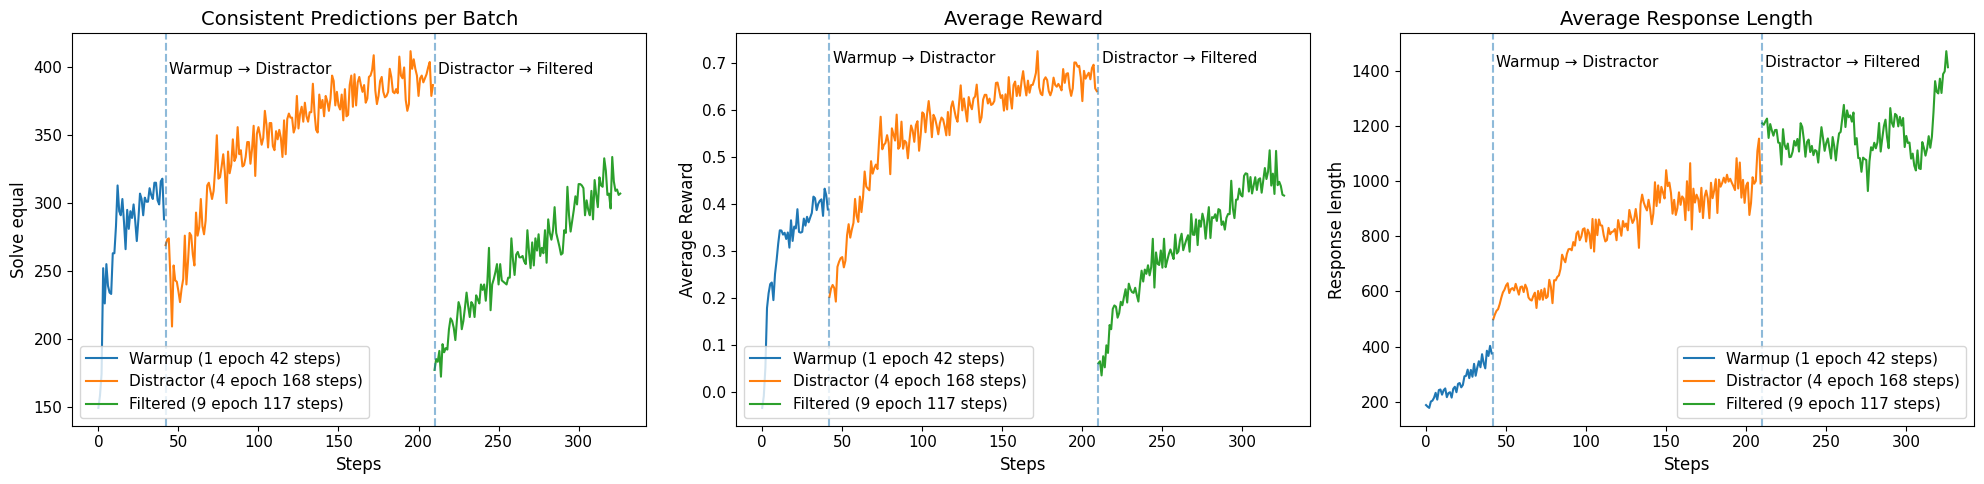

In [50]:
import wandb
import numpy as np
import matplotlib.pyplot as plt

api = wandb.Api()

# 三个 run
qwen14B_warmup_run = api.run(
    "nobleai-xjtu/verl_rej_test/runs/verl_rej_test--qwen25_fix_no_entro_2node_16k_2k_math_filtered_nodis_mathqa_512bsz_20ksamples_SUBEM_end"
)  # 1 epoch ~42 steps
qwen14B_first_run = api.run(
    "snail-ai-lab/verl_rej_test/runs/verl_rej_test--CURR_NODISS1E_no_entro_2node_16k_2k_math_filtered_dis_mathqa_512bsz_20ksamples_grpo_subem_end"
)  # 4 epoch ~168 steps
qwen14B_filter_run = api.run(
    "nobleai-xjtu/verl_rej_test/runs/verl_rej_test--curnodis169_2node_16k_2k_math_FILTERedAGAIN_dis_numchain64_mathqa_512bsz_grpo_SUBEM_end"
)  # max ~151 steps

BATCHSIZE = 512

# ---------- helpers ----------
def fixed_reward_series(run, batchsize=BATCHSIZE):
    hist = run.history(keys=[
        "critic/returns/mean",
        "critic/num_all_right",
        "critic/num_all_wrong",
    ])
    returns_mean = np.array(hist.get("critic/returns/mean", []), dtype=float)
    num_right    = np.array(hist.get("critic/num_all_right", []), dtype=float)
    num_wrong    = np.array(hist.get("critic/num_all_wrong", []), dtype=float)
    L = min(len(returns_mean), len(num_right), len(num_wrong))
    returns_mean, num_right, num_wrong = returns_mean[:L], num_right[:L], num_wrong[:L]
    return (returns_mean * (batchsize - num_wrong - num_right) + num_right) / batchsize

def get_response_length(run):
    hist = run.history(keys=["response_length/mean"])
    return np.array(hist.get("response_length/mean", []), dtype=float)

def get_solve_equal(run):
    hist = run.history(keys=["batch/solve_equal"])
    return np.array(hist.get("batch/solve_equal", []), dtype=float)

# ---------- data ----------
y_warmup_rew = fixed_reward_series(qwen14B_warmup_run)
y_first_rew  = fixed_reward_series(qwen14B_first_run)
y_filter_rew = fixed_reward_series(qwen14B_filter_run)

y_warmup_len = get_response_length(qwen14B_warmup_run)
y_first_len  = get_response_length(qwen14B_first_run)
y_filter_len = get_response_length(qwen14B_filter_run)

y_warmup_solve = get_solve_equal(qwen14B_warmup_run)
y_first_solve  = get_solve_equal(qwen14B_first_run)
y_filter_solve = get_solve_equal(qwen14B_filter_run)

# 三段长度
x0, x1, x2 = 42, 168, 117
split_points = [(x0, "Warmup → Distractor"), (x0+x1, "Distractor → Filtered")]

# ---------- global font ----------
plt.rcParams.update({
    "font.size": 12,          # 默认字体
    "axes.titlesize": 14,     # 子图标题
    "axes.labelsize": 12,     # 坐标轴标签
    "xtick.labelsize": 11,    # x刻度
    "ytick.labelsize": 11,    # y刻度
    "legend.fontsize": 11     # 图例
})

# ---------- plots ----------
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharex=False)
plt.subplots_adjust(wspace=0.3)

# ---- 图1: solve equal ----
ax = axes[0]
ax.plot(range(0, x0), y_warmup_solve[:x0], label="Warmup (1 epoch 42 steps)")
ax.plot(range(x0, x0+x1), y_first_solve[:x1], label="Distractor (4 epoch 168 steps)")
ax.plot(range(x0+x1, x0+x1+x2), y_filter_solve[:x2], label="Filtered (9 epoch 117 steps)")
for xpos, name in split_points:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5)
    ax.text(xpos+2, ax.get_ylim()[1]*0.95, name, fontsize=11, va="top")
ax.set_xlabel("Steps")
ax.set_ylabel("Solve equal")
ax.set_title("Consistent Predictions per Batch")
ax.legend()

# ---- 图2: fixed reward ----
ax = axes[1]
ax.plot(range(0, x0), y_warmup_rew[:x0], label="Warmup (1 epoch 42 steps)")
ax.plot(range(x0, x0+x1), y_first_rew[:x1], label="Distractor (4 epoch 168 steps)")
ax.plot(range(x0+x1, x0+x1+x2), y_filter_rew[:x2], label="Filtered (9 epoch 117 steps)")
for xpos, name in split_points:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5)
    ax.text(xpos+2, ax.get_ylim()[1]*0.95, name, fontsize=11, va="top")
ax.set_xlabel("Steps")
ax.set_ylabel("Average Reward")
ax.set_title("Average Reward")
ax.legend()

# ---- 图3: response length ----
ax = axes[2]
ax.plot(range(0, x0), y_warmup_len[:x0], label="Warmup (1 epoch 42 steps)")
ax.plot(range(x0, x0+x1), y_first_len[:x1], label="Distractor (4 epoch 168 steps)")
ax.plot(range(x0+x1, x0+x1+x2), y_filter_len[:x2], label="Filtered (9 epoch 117 steps)")
for xpos, name in split_points:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5)
    ax.text(xpos+2, ax.get_ylim()[1]*0.95, name, fontsize=11, va="top")
ax.set_xlabel("Steps")
ax.set_ylabel("Response length")
ax.set_title("Average Response Length")
ax.legend()

plt.tight_layout()
plt.show()

[]

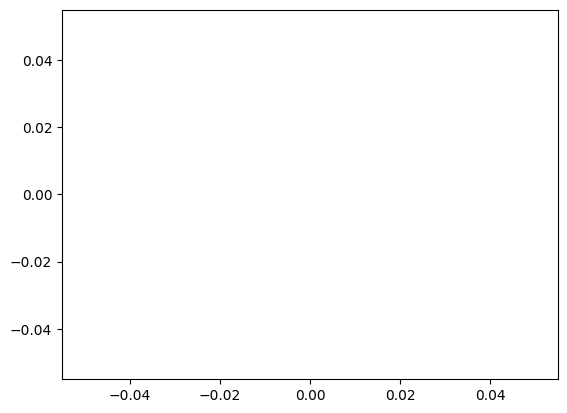

In [4]:
def get_mean_valid(run):

    valid_set=[
        'val/test_score/custom_longcontextqa_hotpotqa',
        'val/test_score/custom_longcontextqa_musique',
        'val/test_score/custom_longcontextqa_2wikimqa',
    ]
    hist = run.history(keys=valid_set)
    # return np.array(hist.get("batch/solve_equal", []), dtype=float)
    return np.array([hist.get(key, []) for key in valid_set], dtype=float).mean(axis=0)

plt.plot()


NameError: name 'y_warmup_solve' is not defined

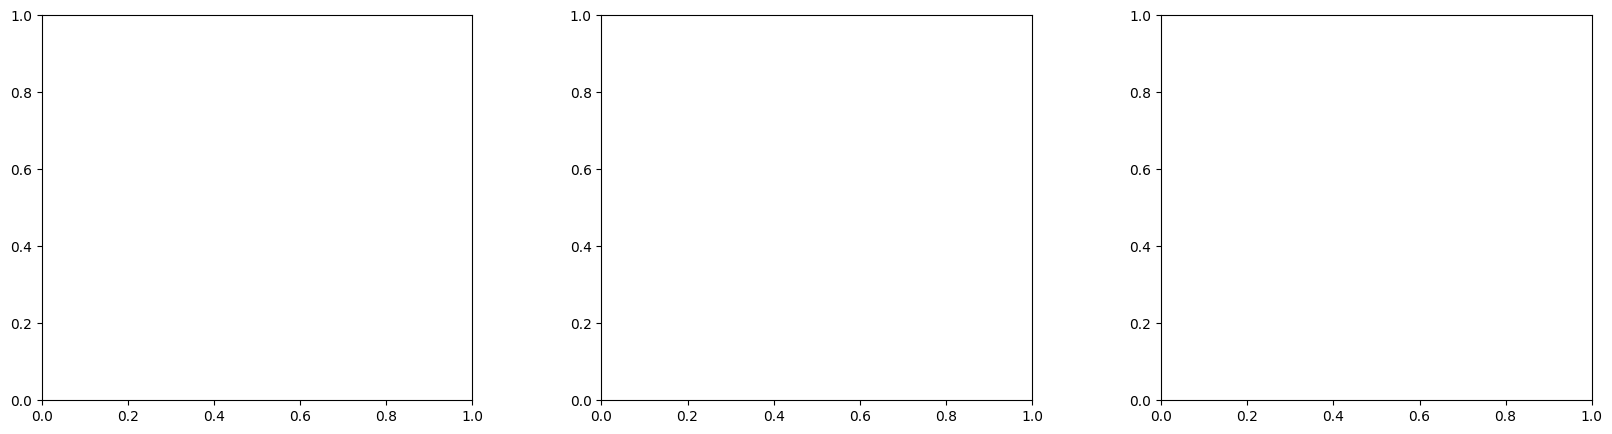

In [6]:

# ---------- plots ----------
x0, x1, x2 = 42, 168, 117
split_points = [(x0, "Warmup → Distractor"), (x0+x1, "Distractor → Hard-Mined")]
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharex=False)
plt.subplots_adjust(wspace=0.3)

# ---- 图1: solve equal ----
ax = axes[0]
ax.plot(range(0, x0), y_warmup_solve[:x0], label="Warmup (1 epoch 42 steps)")
ax.plot(range(x0, x0+x1), y_first_solve[:x1], label="Distractor (4 epoch 168 steps)")
ax.plot(range(x0+x1, x0+x1+x2), y_filter_solve[:x2], label="Hard-Mined (9 epoch 117 steps)")
for xpos, name in split_points:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5)
    ax.text(xpos+2, ax.get_ylim()[1]*0.95, name, fontsize=11, va="top")
ax.set_xlabel("Steps")
ax.set_ylabel("Solve equal")
ax.set_title("Consistent Predictions per Batch")

# ---- 图2: fixed reward ----
ax = axes[1]
ax.plot(range(0, x0), y_warmup_rew[:x0], label="Warmup (1 epoch 42 steps)")
ax.plot(range(x0, x0+x1), y_first_rew[:x1], label="Distractor (4 epoch 168 steps)")
ax.plot(range(x0+x1, x0+x1+x2), y_filter_rew[:x2], label="Hard-Mined (9 epoch 117 steps)")
for xpos, name in split_points:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5)
    ax.text(xpos+2, ax.get_ylim()[1]*0.95, name, fontsize=11, va="top")
ax.set_xlabel("Steps")
ax.set_ylabel("Average Reward")
ax.set_title("Average Reward")

# ---- 图3: response length ----
ax = axes[2]
ax.plot(range(0, x0), y_warmup_len[:x0], label="Warmup (1 epoch 42 steps)")
ax.plot(range(x0, x0+x1), y_first_len[:x1], label="Distractor (4 epoch 168 steps)")
ax.plot(range(x0+x1, x0+x1+x2), y_filter_len[:x2], label="Hard-Mined (9 epoch 117 steps)")
for xpos, name in split_points[:-1]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5)
    ax.text(xpos+2, ax.get_ylim()[1]*0.95, name, fontsize=11, va="top")
# draw the last split point lower
for xpos, name in split_points[-1:]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5)
    ax.text(xpos+2, ax.get_ylim()[1]*0.55, name, fontsize=11, va="top")
ax.set_xlabel("Steps")
ax.set_ylabel("Response length")
ax.set_title("Average Response Length")

# ---------- global legend ----------
# 从最后一个子图获取 legend 句柄和标签
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=3, bbox_to_anchor=(0.5, 1.05))

plt.tight_layout()
plt.savefig("qwen-7b_keychain_train_hardmined.pdf", bbox_inches='tight')
plt.show()

# export to qwen-7b_keychain_train.pdf


/tmp/ipykernel_1593991/3000593109.py:5: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.0)
/tmp/ipykernel_1593991/3000593109.py:72: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


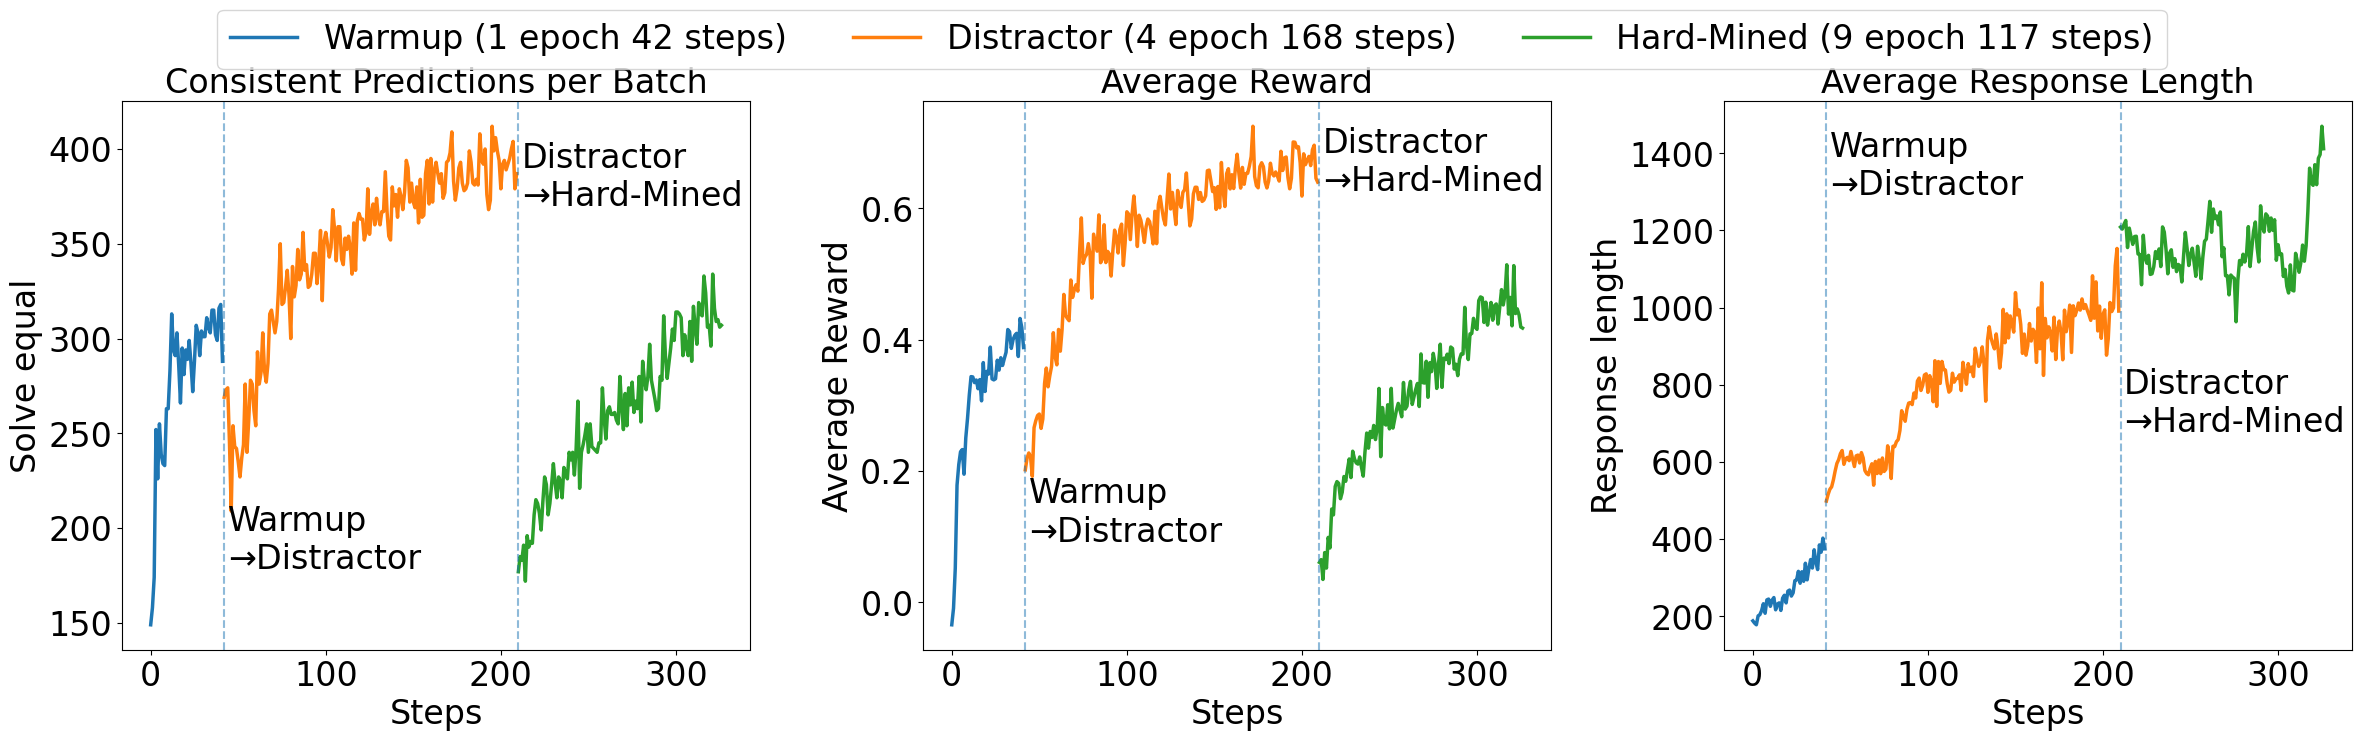

In [37]:
# ---------- plots ----------
x0, x1, x2 = 42, 168, 117
split_points = [(x0, "Warmup\n→Distractor"), (x0+x1, "Distractor\n→Hard-Mined")]
fig, axes = plt.subplots(1, 3, figsize=(24, 7), sharex=False, constrained_layout=True,) 
plt.subplots_adjust(wspace=0.0)

line_width = 2.5   # 线条加粗
# label_fontsize = 14
# title_fontsize = 16
# tick_fontsize = 12
# line_width = 3.0    # 线条更粗
label_fontsize = 24 # 坐标轴标签
title_fontsize = 24 # 图标题
tick_fontsize = 24  # 坐标轴刻度
legend_fontsize = 24 # 图例
split_fontsize = 20 # 分段文字

# ---- 图1: solve equal ----
ax = axes[0]
ax.plot(range(0, x0), y_warmup_solve[:x0], label="Warmup (1 epoch 42 steps)", linewidth=line_width)
ax.plot(range(x0, x0+x1), y_first_solve[:x1], label="Distractor (4 epoch 168 steps)", linewidth=line_width)
ax.plot(range(x0+x1, x0+x1+x2), y_filter_solve[:x2], label="Hard-Mined (9 epoch 117 steps)", linewidth=line_width)

for xpos, name in split_points[:1]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5, linewidth=1.5)
    ax.text(xpos+2, ax.get_ylim()[1]*0.5, name, fontsize=label_fontsize, va="top")
for xpos, name in split_points[1:]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5, linewidth=1.5)
    ax.text(xpos+2, ax.get_ylim()[1]*0.95, name, fontsize=label_fontsize, va="top")
ax.set_xlabel("Steps", fontsize=label_fontsize)
ax.set_ylabel("Solve equal", fontsize=label_fontsize)
ax.set_title("Consistent Predictions per Batch", fontsize=title_fontsize)
ax.tick_params(axis="both", labelsize=tick_fontsize)

# ---- 图2: fixed reward ----
ax = axes[1]
ax.plot(range(0, x0), y_warmup_rew[:x0], label="Warmup (1 epoch 42 steps)", linewidth=line_width)
ax.plot(range(x0, x0+x1), y_first_rew[:x1], label="Distractor (4 epoch 168 steps)", linewidth=line_width)
ax.plot(range(x0+x1, x0+x1+x2), y_filter_rew[:x2], label="Hard-Mined (9 epoch 117 steps)", linewidth=line_width)
for xpos, name in split_points[:1]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5, linewidth=1.5)
    ax.text(xpos+2, ax.get_ylim()[1]*0.25, name, fontsize=label_fontsize, va="top")
for xpos, name in split_points[1:]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5, linewidth=1.5)
    ax.text(xpos+2, ax.get_ylim()[1]*0.95, name, fontsize=label_fontsize, va="top")
ax.set_xlabel("Steps", fontsize=label_fontsize)
ax.set_ylabel("Average Reward", fontsize=label_fontsize)
ax.set_title("Average Reward", fontsize=title_fontsize)
ax.tick_params(axis="both", labelsize=tick_fontsize)

# ---- 图3: response length ----
ax = axes[2]
ax.plot(range(0, x0), y_warmup_len[:x0], label="Warmup (1 epoch 42 steps)", linewidth=line_width)
ax.plot(range(x0, x0+x1), y_first_len[:x1], label="Distractor (4 epoch 168 steps)", linewidth=line_width)
ax.plot(range(x0+x1, x0+x1+x2), y_filter_len[:x2], label="Hard-Mined (9 epoch 117 steps)", linewidth=line_width)
for xpos, name in split_points[:-1]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5, linewidth=1.5)
    ax.text(xpos+2, ax.get_ylim()[1]*0.95, name, fontsize=label_fontsize, va="top")
# draw the last split point lower
for xpos, name in split_points[-1:]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5, linewidth=1.5)
    ax.text(xpos+2, ax.get_ylim()[1]*0.55, name, fontsize=label_fontsize, va="top")
ax.set_xlabel("Steps", fontsize=label_fontsize)
ax.set_ylabel("Response length", fontsize=label_fontsize)
ax.set_title("Average Response Length", fontsize=title_fontsize)
ax.tick_params(axis="both", labelsize=tick_fontsize)

# ---------- global legend ----------
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=3, bbox_to_anchor=(0.5, 1.08), fontsize=label_fontsize)

plt.tight_layout()
plt.savefig("qwen-7b_keychain_train_hardmined_font_big.pdf", bbox_inches='tight')
plt.show()

/tmp/ipykernel_1593991/1392688129.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.92])
/tmp/ipykernel_1593991/1392688129.py:81: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.92])


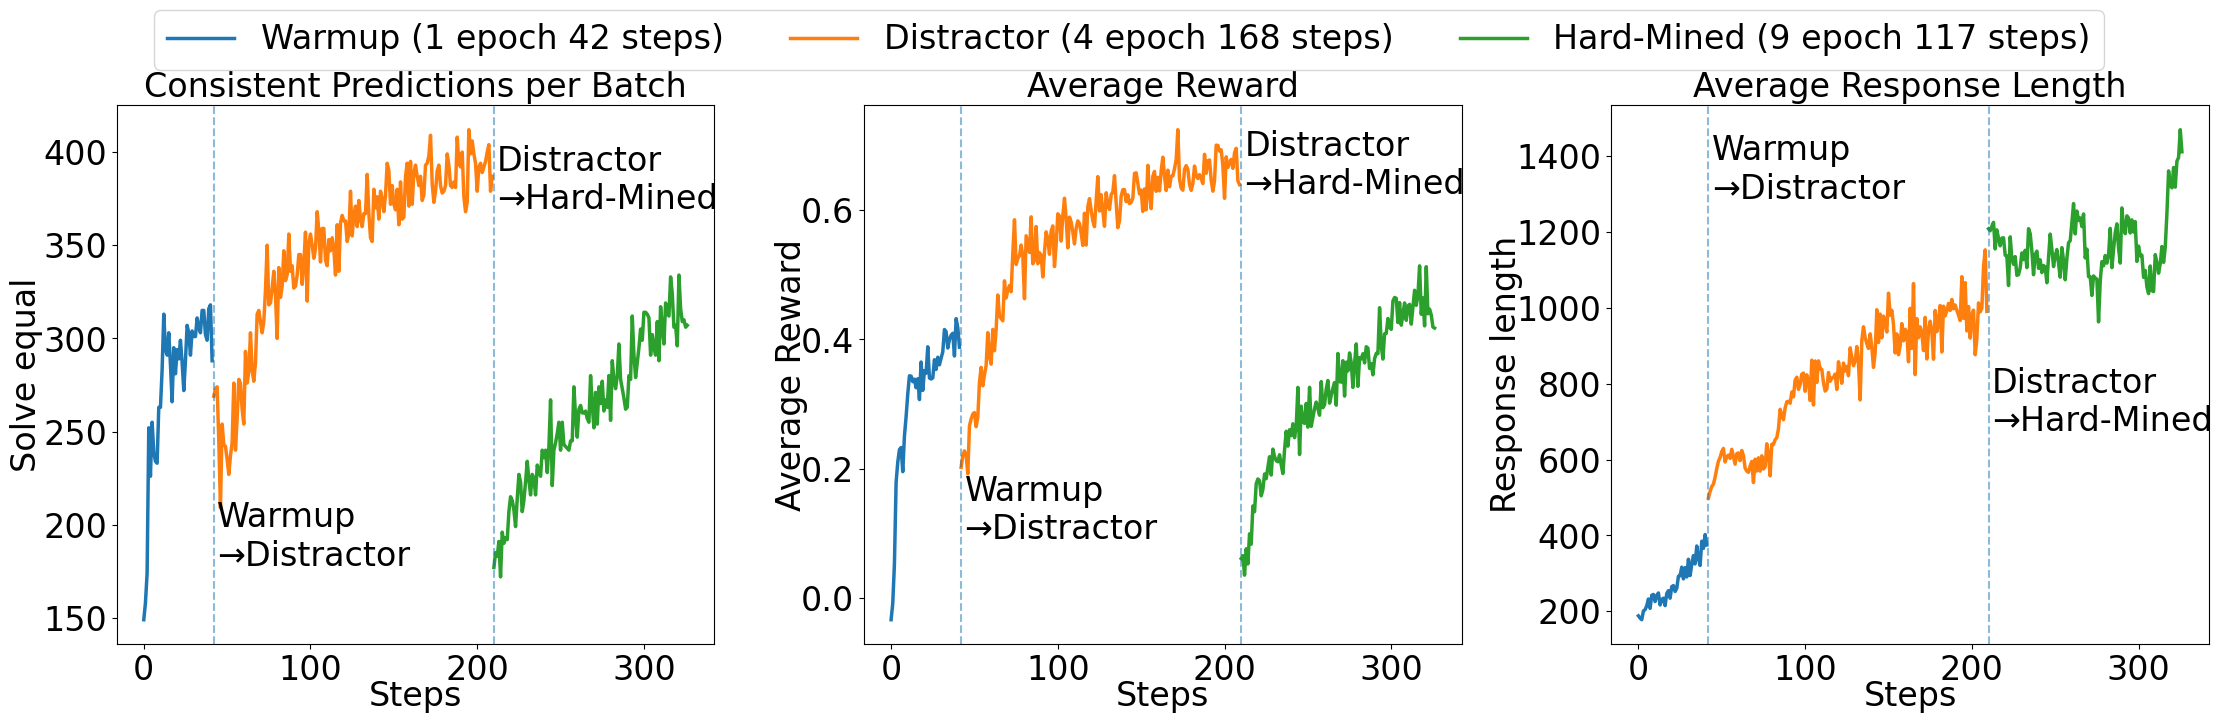

In [75]:
import matplotlib.pyplot as plt

# ---------- plots ----------
x0, x1, x2 = 42, 168, 117
split_points = [(x0, "Warmup\n→Distractor"), (x0+x1, "Distractor\n→Hard-Mined")]

fig, axes = plt.subplots(1, 3, figsize=(27, 7), sharex=False, constrained_layout=True, gridspec_kw={'wspace': 0.25})

# 控制全局间距 (越小越紧凑)
fig.set_constrained_layout_pads(wspace=0.02, hspace=0.02)

line_width = 2.5
label_fontsize = 24
title_fontsize = 24
tick_fontsize = 24
legend_fontsize = 24
split_fontsize = 20

# ---- 图1: solve equal ----
ax = axes[0]
ax.plot(range(0, x0), y_warmup_solve[:x0], label="Warmup (1 epoch 42 steps)", linewidth=line_width)
ax.plot(range(x0, x0+x1), y_first_solve[:x1], label="Distractor (4 epoch 168 steps)", linewidth=line_width)
ax.plot(range(x0+x1, x0+x1+x2), y_filter_solve[:x2], label="Hard-Mined (9 epoch 117 steps)", linewidth=line_width)

for xpos, name in split_points[:1]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5, linewidth=1.5)
    ax.text(xpos+2, ax.get_ylim()[1]*0.5, name, fontsize=label_fontsize, va="top")
for xpos, name in split_points[1:]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5, linewidth=1.5)
    ax.text(xpos+2, ax.get_ylim()[1]*0.95, name, fontsize=label_fontsize, va="top")

ax.set_xlabel("Steps", fontsize=label_fontsize, labelpad=-5)
ax.set_ylabel("Solve equal", fontsize=label_fontsize, labelpad=0)
ax.set_title("Consistent Predictions per Batch", fontsize=title_fontsize)
ax.tick_params(axis="both", labelsize=tick_fontsize)

# ---- 图2: fixed reward ----
ax = axes[1]
ax.plot(range(0, x0), y_warmup_rew[:x0], label="Warmup (1 epoch 42 steps)", linewidth=line_width)
ax.plot(range(x0, x0+x1), y_first_rew[:x1], label="Distractor (4 epoch 168 steps)", linewidth=line_width)
ax.plot(range(x0+x1, x0+x1+x2), y_filter_rew[:x2], label="Hard-Mined (9 epoch 117 steps)", linewidth=line_width)

for xpos, name in split_points[:1]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5, linewidth=1.5)
    ax.text(xpos+2, ax.get_ylim()[1]*0.25, name, fontsize=label_fontsize, va="top")
for xpos, name in split_points[1:]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5, linewidth=1.5)
    ax.text(xpos+2, ax.get_ylim()[1]*0.95, name, fontsize=label_fontsize, va="top")

ax.set_xlabel("Steps", fontsize=label_fontsize, labelpad=-5)
ax.set_ylabel("Average Reward", fontsize=label_fontsize, labelpad=-5)
ax.set_title("Average Reward", fontsize=title_fontsize)
ax.tick_params(axis="both", labelsize=tick_fontsize)

# ---- 图3: response length ----
ax = axes[2]
ax.plot(range(0, x0), y_warmup_len[:x0], label="Warmup (1 epoch 42 steps)", linewidth=line_width)
ax.plot(range(x0, x0+x1), y_first_len[:x1], label="Distractor (4 epoch 168 steps)", linewidth=line_width)
ax.plot(range(x0+x1, x0+x1+x2), y_filter_len[:x2], label="Hard-Mined (9 epoch 117 steps)", linewidth=line_width)

for xpos, name in split_points[:-1]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5, linewidth=1.5)
    ax.text(xpos+2, ax.get_ylim()[1]*0.95, name, fontsize=label_fontsize, va="top")
for xpos, name in split_points[-1:]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5, linewidth=1.5)
    ax.text(xpos+2, ax.get_ylim()[1]*0.55, name, fontsize=label_fontsize, va="top")

ax.set_xlabel("Steps", fontsize=label_fontsize, labelpad=-5)
ax.set_ylabel("Response length", fontsize=label_fontsize, labelpad=-5)
ax.set_title("Average Response Length", fontsize=title_fontsize)
ax.tick_params(axis="both", labelsize=tick_fontsize)

# ---------- 全局等距对齐 ----------
fig.align_ylabels(axes)

# ---------- 全局图例 ----------
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=3,
           bbox_to_anchor=(0.5, 1.04), fontsize=label_fontsize,)
# 保存/显示
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.savefig("qwen-7b_keychain_train_hardmined_font_big.pdf", bbox_inches='tight')
plt.show()

/tmp/ipykernel_1593991/1631400237.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.92]) # Reserve top 8% of the figure for the legend


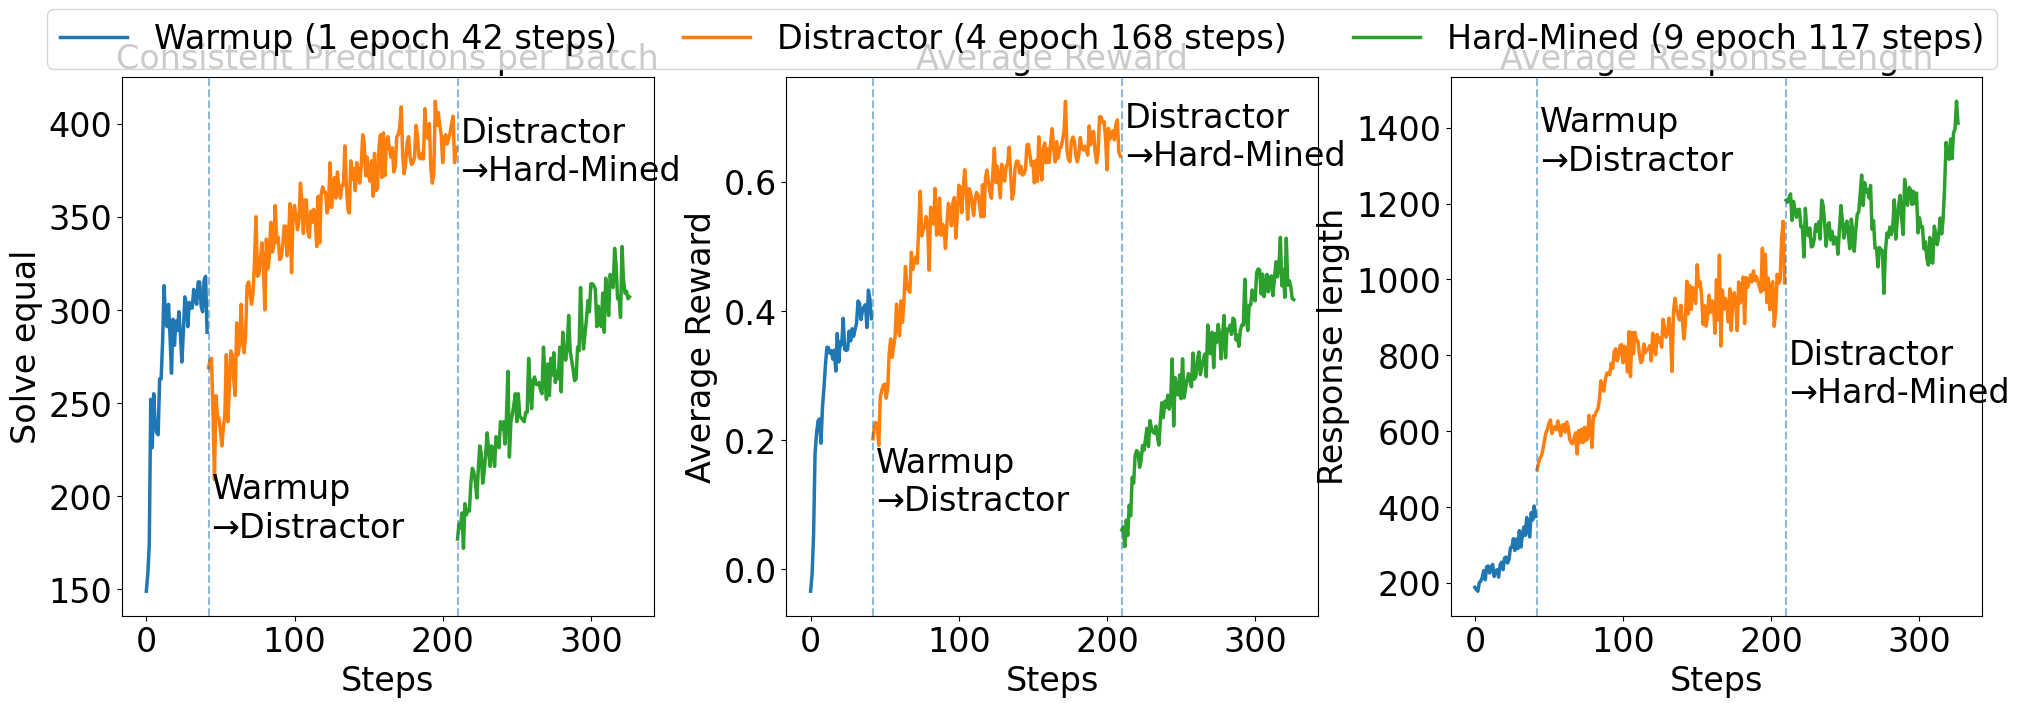

In [ ]:
import matplotlib.pyplot as plt
# Assuming y_... variables are defined elsewhere
import numpy as np

# Sample data for demonstration
x0, x1, x2 = 42, 168, 117



# ---------- plots ----------
split_points = [(x0, "Warmup\n→Distractor"), (x0+x1, "Distractor\n→Hard-Mined")]

# Create subplots WITHOUT constrained_layout
fig, axes = plt.subplots(1, 3, figsize=(24, 7), sharex=False)

line_width = 2.5
label_fontsize = 24
title_fontsize = 24
tick_fontsize = 24
legend_fontsize = 24
split_fontsize = 20

# ---- Plot 1: solve equal ----
ax = axes[0]
ax.plot(range(0, x0), y_warmup_solve[:x0], label="Warmup (1 epoch 42 steps)", linewidth=line_width)
ax.plot(range(x0, x0+x1), y_first_solve[:x1], label="Distractor (4 epoch 168 steps)", linewidth=line_width)
ax.plot(range(x0+x1, x0+x1+x2), y_filter_solve[:x2], label="Hard-Mined (9 epoch 117 steps)", linewidth=line_width)

for xpos, name in split_points[:1]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5, linewidth=1.5)
    ax.text(xpos+2, ax.get_ylim()[1]*0.5, name, fontsize=label_fontsize, va="top")
for xpos, name in split_points[1:]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5, linewidth=1.5)
    ax.text(xpos+2, ax.get_ylim()[1]*0.95, name, fontsize=label_fontsize, va="top")

ax.set_xlabel("Steps", fontsize=label_fontsize)
ax.set_ylabel("Solve equal", fontsize=label_fontsize)
ax.set_title("Consistent Predictions per Batch", fontsize=title_fontsize)
ax.tick_params(axis="both", labelsize=tick_fontsize)

# ---- Plot 2: fixed reward ----
ax = axes[1]
ax.plot(range(0, x0), y_warmup_rew[:x0], label="Warmup (1 epoch 42 steps)", linewidth=line_width)
ax.plot(range(x0, x0+x1), y_first_rew[:x1], label="Distractor (4 epoch 168 steps)", linewidth=line_width)
ax.plot(range(x0+x1, x0+x1+x2), y_filter_rew[:x2], label="Hard-Mined (9 epoch 117 steps)", linewidth=line_width)

for xpos, name in split_points[:1]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5, linewidth=1.5)
    ax.text(xpos+2, ax.get_ylim()[1]*0.25, name, fontsize=label_fontsize, va="top")
for xpos, name in split_points[1:]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5, linewidth=1.5)
    ax.text(xpos+2, ax.get_ylim()[1]*0.95, name, fontsize=label_fontsize, va="top")

ax.set_xlabel("Steps", fontsize=label_fontsize)
ax.set_ylabel("Average Reward", fontsize=label_fontsize)
ax.set_title("Average Reward", fontsize=title_fontsize)
ax.tick_params(axis="both", labelsize=tick_fontsize)

# ---- Plot 3: response length ----
ax = axes[2]
ax.plot(range(0, x0), y_warmup_len[:x0], label="Warmup (1 epoch 42 steps)", linewidth=line_width)
ax.plot(range(x0, x0+x1), y_first_len[:x1], label="Distractor (4 epoch 168 steps)", linewidth=line_width)
ax.plot(range(x0+x1, x0+x1+x2), y_filter_len[:x2], label="Hard-Mined (9 epoch 117 steps)", linewidth=line_width)

for xpos, name in split_points[:-1]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5, linewidth=1.5)
    ax.text(xpos+2, ax.get_ylim()[1]*0.95, name, fontsize=label_fontsize, va="top")
for xpos, name in split_points[-1:]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5, linewidth=1.5)
    ax.text(xpos+2, ax.get_ylim()[1]*0.55, name, fontsize=label_fontsize, va="top")

ax.set_xlabel("Steps", fontsize=label_fontsize)
ax.set_ylabel("Response length", fontsize=label_fontsize)
ax.set_title("Average Response Length", fontsize=title_fontsize)
ax.tick_params(axis="both", labelsize=tick_fontsize)

# ---------- Global alignment ----------
fig.align_ylabels(axes)

# ---------- Global legend ----------
handles, labels = axes[-1].get_legend_handles_labels()
# Adjust the y-value slightly if needed after using tight_layout
fig.legend(handles, labels, loc="upper center", ncol=3,
           bbox_to_anchor=(0.5, 1.0), fontsize=legend_fontsize) # y can be 1.0 now

# ---------- Adjust layout and save/show ----------
# Use tight_layout with rect to make space for the legend
plt.tight_layout(rect=[0, 0, 1, 0.92]) # Reserve top 8% of the figure for the legend

plt.savefig("qwen-7b_keychain_train_hardmined_font_big.pdf", bbox_inches='tight')
plt.show()

/tmp/ipykernel_1593991/2183773161.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.92])
/tmp/ipykernel_1593991/2183773161.py:93: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.92])


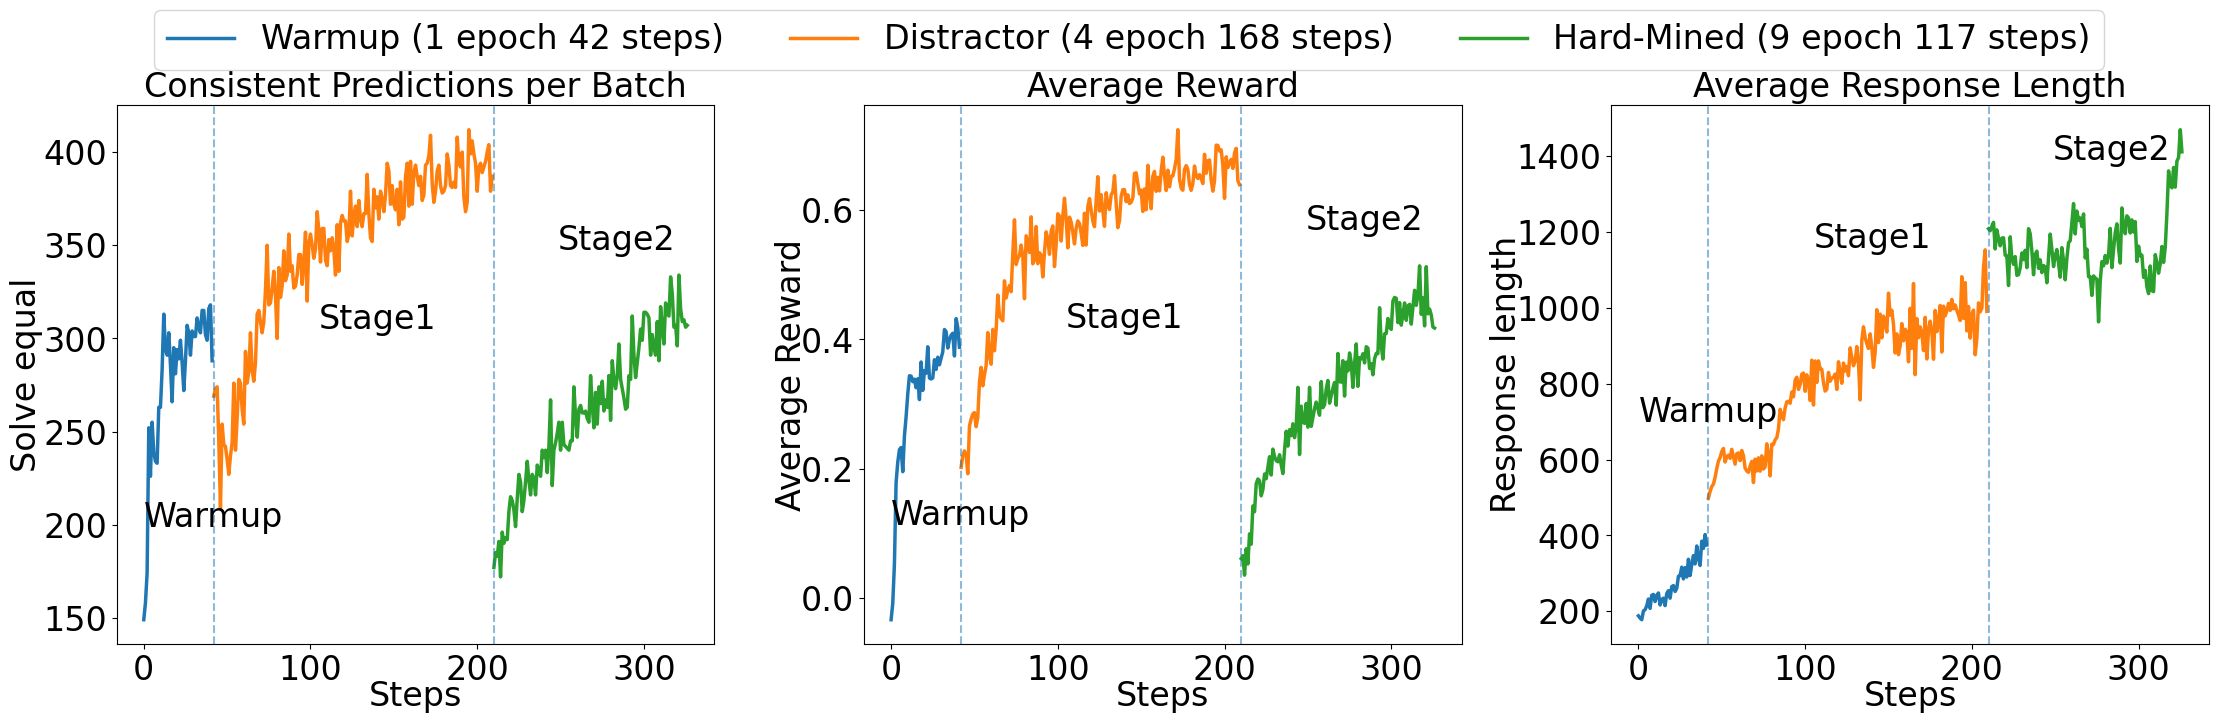

In [101]:
import matplotlib.pyplot as plt

# ---------- plots ----------
x0, x1, x2 = 42, 168, 117
split_points = [(x0, "Warmup\n→Distractor"), (x0+x1, "Distractor\n→Hard-Mined")]

fig, axes = plt.subplots(1, 3, figsize=(27, 7), sharex=False, constrained_layout=True, gridspec_kw={'wspace': 0.25})

# 控制全局间距 (越小越紧凑)
fig.set_constrained_layout_pads(wspace=0.02, hspace=0.02)

line_width = 2.5
label_fontsize = 24
title_fontsize = 24
tick_fontsize = 24
legend_fontsize = 24
split_fontsize = 20


# ---- 图1: solve equal ----
ax = axes[0]
ax.plot(range(0, x0), y_warmup_solve[:x0], label="Warmup (1 epoch 42 steps)", linewidth=line_width)
ax.plot(range(x0, x0+x1), y_first_solve[:x1], label="Stage1 (4 epoch 168 steps)", linewidth=line_width)
ax.plot(range(x0+x1, x0+x1+x2), y_filter_solve[:x2], label="Stage2 (9 epoch 117 steps)", linewidth=line_width)

for xpos, name in split_points[:1]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5, linewidth=1.5)
    # ax.text(xpos+2, ax.get_ylim()[1]*0.5, name, fontsize=label_fontsize, va="top")

for xpos, name in split_points[1:]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5, linewidth=1.5)
    # ax.text(xpos+2, ax.get_ylim()[1]*0.95, name, fontsize=label_fontsize, va="top")

ax.text((0)/2, ax.get_ylim()[1]*0.5, "Warmup", fontsize=label_fontsize, va="top")
ax.text((x0+x1)/2, ax.get_ylim()[1]*0.75, "Stage1", fontsize=label_fontsize, va="top")
ax.text((x0+x1+x0+x1+x2)/2-20, ax.get_ylim()[1]*0.85, "Stage2", fontsize=label_fontsize, va="top")

ax.set_xlabel("Steps", fontsize=label_fontsize, labelpad=-5)
ax.set_ylabel("Solve equal", fontsize=label_fontsize, labelpad=0)
ax.set_title("Consistent Predictions per Batch", fontsize=title_fontsize)
ax.tick_params(axis="both", labelsize=tick_fontsize)

# ---- 图2: fixed reward ----
ax = axes[1]
ax.plot(range(0, x0), y_warmup_rew[:x0], label="Warmup (1 epoch 42 steps)", linewidth=line_width)
ax.plot(range(x0, x0+x1), y_first_rew[:x1], label="Distractor (4 epoch 168 steps)", linewidth=line_width)
ax.plot(range(x0+x1, x0+x1+x2), y_filter_rew[:x2], label="Hard-Mined (9 epoch 117 steps)", linewidth=line_width)

for xpos, name in split_points[:1]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5, linewidth=1.5)
    # ax.text(xpos+2, ax.get_ylim()[1]*0.25, name, fontsize=label_fontsize, va="top")
for xpos, name in split_points[1:]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5, linewidth=1.5)
    # ax.text(xpos+2, ax.get_ylim()[1]*0.95, name, fontsize=label_fontsize, va="top")

ax.text((0)/2, ax.get_ylim()[1]*0.2, "Warmup", fontsize=label_fontsize, va="top")
ax.text((x0+x1)/2, ax.get_ylim()[1]*0.6, "Stage1", fontsize=label_fontsize, va="top")
ax.text((x0+x1+x0+x1+x2)/2-20, ax.get_ylim()[1]*0.8, "Stage2", fontsize=label_fontsize, va="top")
ax.set_xlabel("Steps", fontsize=label_fontsize, labelpad=-5)
ax.set_ylabel("Average Reward", fontsize=label_fontsize, labelpad=-5)
ax.set_title("Average Reward", fontsize=title_fontsize)
ax.tick_params(axis="both", labelsize=tick_fontsize)

# ---- 图3: response length ----
ax = axes[2]
ax.plot(range(0, x0), y_warmup_len[:x0], label="Warmup (1 epoch 42 steps)", linewidth=line_width)
ax.plot(range(x0, x0+x1), y_first_len[:x1], label="Distractor (4 epoch 168 steps)", linewidth=line_width)
ax.plot(range(x0+x1, x0+x1+x2), y_filter_len[:x2], label="Hard-Mined (9 epoch 117 steps)", linewidth=line_width)

for xpos, name in split_points[:-1]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5, linewidth=1.5)
    # ax.text(xpos+2, ax.get_ylim()[1]*0.95, name, fontsize=label_fontsize, va="top")
for xpos, name in split_points[-1:]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5, linewidth=1.5)
    # ax.text(xpos+2, ax.get_ylim()[1]*0.55, name, fontsize=label_fontsize, va="top")
ax.text((0)/2, ax.get_ylim()[1]*0.5, "Warmup", fontsize=label_fontsize, va="top")
ax.text((x0+x1)/2, ax.get_ylim()[1]*0.8, "Stage1", fontsize=label_fontsize, va="top")
ax.text((x0+x1+x0+x1+x2)/2-20, ax.get_ylim()[1]*0.95, "Stage2", fontsize=label_fontsize, va="top")

ax.set_xlabel("Steps", fontsize=label_fontsize, labelpad=-5)
ax.set_ylabel("Response length", fontsize=label_fontsize, labelpad=-5)
ax.set_title("Average Response Length", fontsize=title_fontsize)
ax.tick_params(axis="both", labelsize=tick_fontsize)

# ---------- 全局等距对齐 ----------
fig.align_ylabels(axes)

# ---------- 全局图例 ----------
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=3,
           bbox_to_anchor=(0.5, 1.04), fontsize=label_fontsize,)
# 保存/显示
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.savefig("qwen-7b_keychain_train_hardmined_font_big.pdf", bbox_inches='tight')
plt.show()

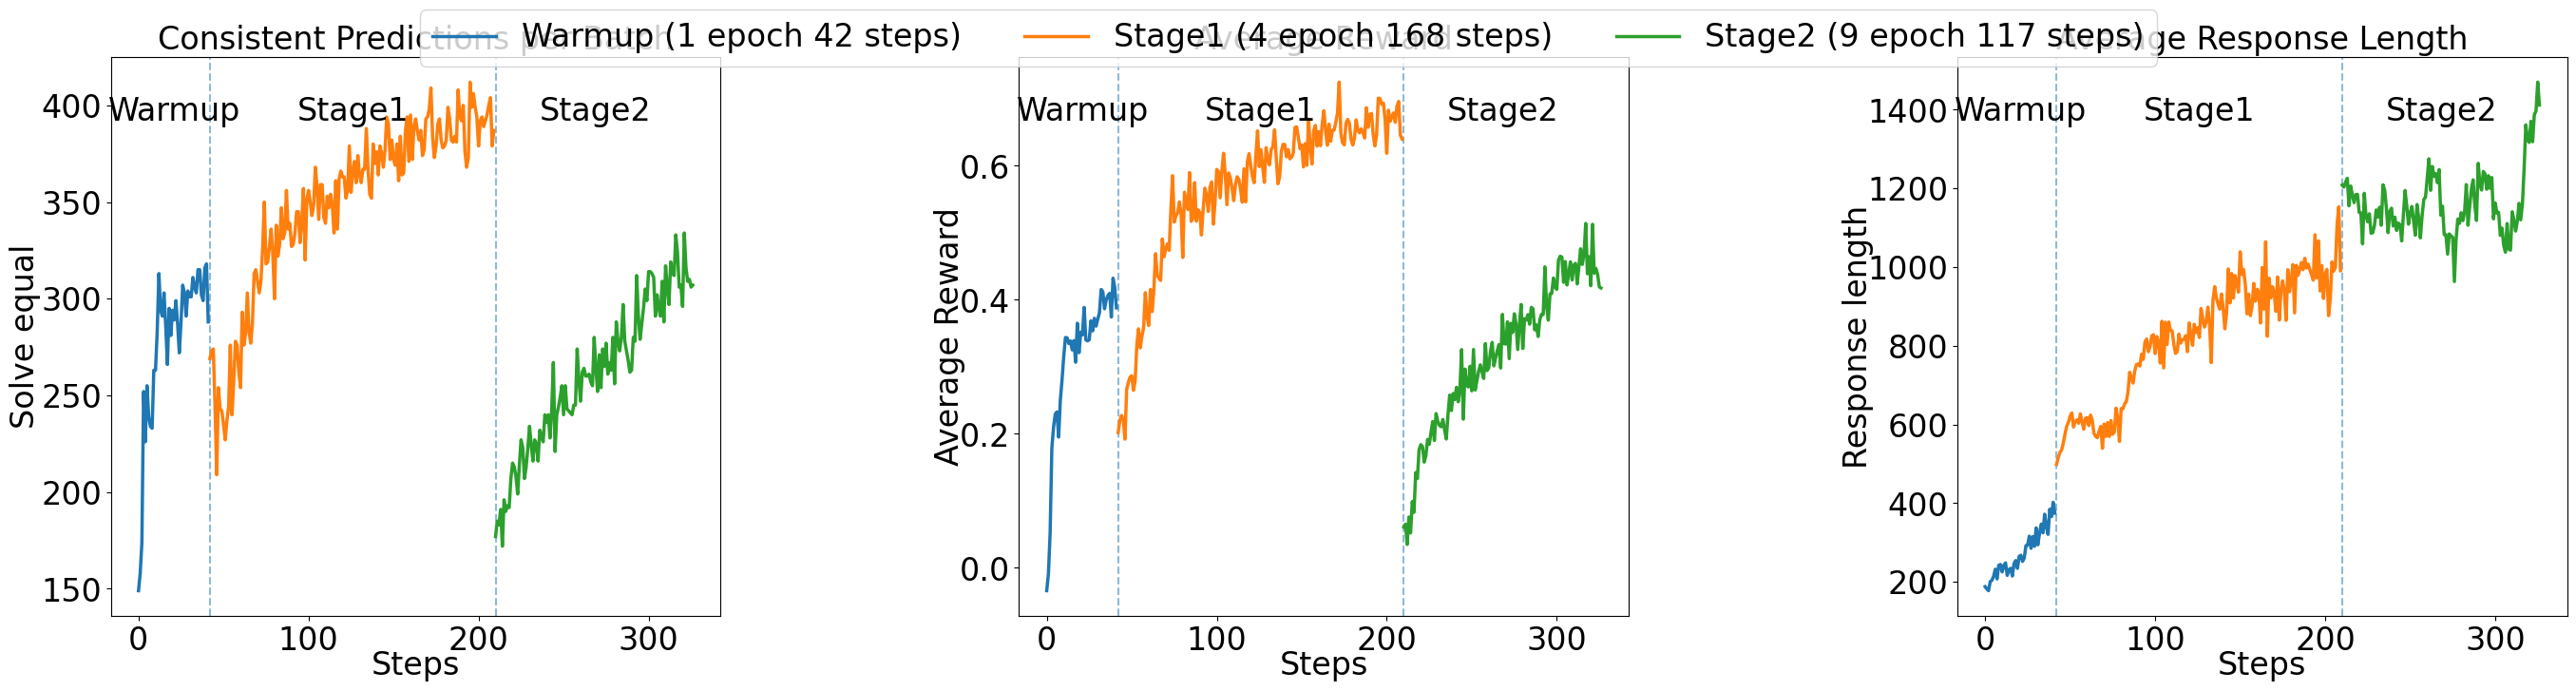

In [79]:
import matplotlib.pyplot as plt

# ---------- plots ----------
x0, x1, x2 = 42, 168, 117
# 定义阶段
stages = [
    (0, x0, "Warmup"),
    (x0, x0+x1, "Stage1"),
    (x0+x1, x0+x1+x2, "Stage2")
]

fig, axes = plt.subplots(
    1, 3, figsize=(27, 7), sharex=False,
    constrained_layout=True, gridspec_kw={'wspace': 0.25}
)
fig.set_constrained_layout_pads(wspace=0.02, hspace=0.02)

line_width = 2.5
label_fontsize = 24
title_fontsize = 24
tick_fontsize = 24
legend_fontsize = 24
split_fontsize = 20

# ---- 图1: solve equal ----
ax = axes[0]
ax.plot(range(0, x0), y_warmup_solve[:x0], label="Warmup (1 epoch 42 steps)", linewidth=line_width)
ax.plot(range(x0, x0+x1), y_first_solve[:x1], label="Stage1 (4 epoch 168 steps)", linewidth=line_width)
ax.plot(range(x0+x1, x0+x1+x2), y_filter_solve[:x2], label="Stage2 (9 epoch 117 steps)", linewidth=line_width)

# 竖线（阶段分界）
for xpos in [x0, x0+x1]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5, linewidth=1.5, zorder=0)

# 在每个阶段中间写名字
ymin, ymax = ax.get_ylim()
for start, end, label in stages:
    xpos = (start + end) / 2
    ax.text(xpos, ymin + 0.93*(ymax - ymin), label, fontsize=label_fontsize,
            ha="center", va="top")

ax.set_xlabel("Steps", fontsize=label_fontsize, labelpad=-5)
ax.set_ylabel("Solve equal", fontsize=label_fontsize, labelpad=0)
ax.set_title("Consistent Predictions per Batch", fontsize=title_fontsize)
ax.tick_params(axis="both", labelsize=tick_fontsize)

# ---- 图2: fixed reward ----
ax = axes[1]
ax.plot(range(0, x0), y_warmup_rew[:x0], label="Warmup (1 epoch 42 steps)", linewidth=line_width)
ax.plot(range(x0, x0+x1), y_first_rew[:x1], label="Stage1 (4 epoch 168 steps)", linewidth=line_width)
ax.plot(range(x0+x1, x0+x1+x2), y_filter_rew[:x2], label="Stage2 (9 epoch 117 steps)", linewidth=line_width)

for xpos in [x0, x0+x1]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5, linewidth=1.5, zorder=0)

ymin, ymax = ax.get_ylim()
for start, end, label in stages:
    xpos = (start + end) / 2
    ax.text(xpos, ymin + 0.93*(ymax - ymin), label, fontsize=label_fontsize,
            ha="center", va="top")

ax.set_xlabel("Steps", fontsize=label_fontsize, labelpad=-5)
ax.set_ylabel("Average Reward", fontsize=label_fontsize, labelpad=-5)
ax.set_title("Average Reward", fontsize=title_fontsize)
ax.tick_params(axis="both", labelsize=tick_fontsize)

# ---- 图3: response length ----
ax = axes[2]
ax.plot(range(0, x0), y_warmup_len[:x0], label="Warmup (1 epoch 42 steps)", linewidth=line_width)
ax.plot(range(x0, x0+x1), y_first_len[:x1], label="Stage1 (4 epoch 168 steps)", linewidth=line_width)
ax.plot(range(x0+x1, x0+x1+x2), y_filter_len[:x2], label="Stage2 (9 epoch 117 steps)", linewidth=line_width)

for xpos in [x0, x0+x1]:
    ax.axvline(x=xpos, linestyle="--", alpha=0.5, linewidth=1.5, zorder=0)

ymin, ymax = ax.get_ylim()
for start, end, label in stages:
    xpos = (start + end) / 2
    ax.text(xpos, ymin + 0.93*(ymax - ymin), label, fontsize=label_fontsize,
            ha="center", va="top")

ax.set_xlabel("Steps", fontsize=label_fontsize, labelpad=-5)
ax.set_ylabel("Response length", fontsize=label_fontsize, labelpad=-5)
ax.set_title("Average Response Length", fontsize=title_fontsize)
ax.tick_params(axis="both", labelsize=tick_fontsize)

# ---------- 全局等距对齐 ----------
fig.align_ylabels(axes)

# ---------- 全局图例 ----------
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=3,
           bbox_to_anchor=(0.5, 1.04), fontsize=legend_fontsize)

plt.savefig("qwen-7b_keychain_train_hardmined_font_big.pdf", bbox_inches='tight', pad_inches=0.02)
plt.show()